In [1]:
import sys
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import IPython
import sklearn
import mglearn
%matplotlib inline

/anaconda3/envs/titanic/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/anaconda3/envs/titanic/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


/anaconda3/envs/titanic/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


X.shape : (26, 2)


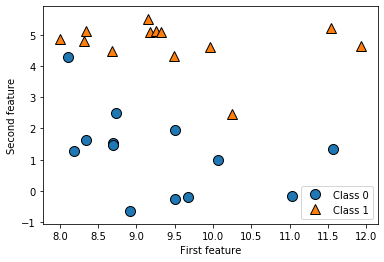

In [2]:
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[: ,0] , X[: , 1] , y)
plt.legend(["Class 0" , "Class 1"] , loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape : {}".format(X.shape))

Text(0, 0.5, 'Target')

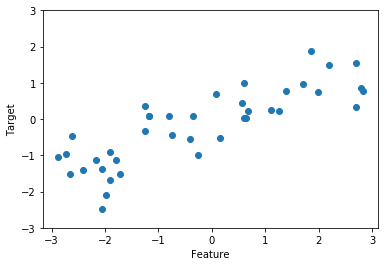

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
display(cancer.keys())
display(cancer.data.shape)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

(569, 30)

In [5]:
print("Sample counts per class : \n {}".format({n: v for n , v in zip(cancer.target_names , np.bincount(cancer.target))}))

Sample counts per class : 
 {'malignant': 212, 'benign': 357}


In [6]:
from sklearn.datasets import load_boston
boston = load_boston()
display(boston.data.shape)

(506, 13)

In [7]:
X , y = mglearn.datasets.load_extended_boston()
display(X.shape)

(506, 104)

/anaconda3/envs/titanic/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


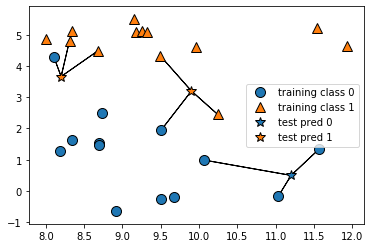

In [9]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [13]:
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_forge()
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=0)

/anaconda3/envs/titanic/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [14]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 3)

In [16]:
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [17]:
clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [18]:
clf.score(X_test,y_test)

0.8571428571428571

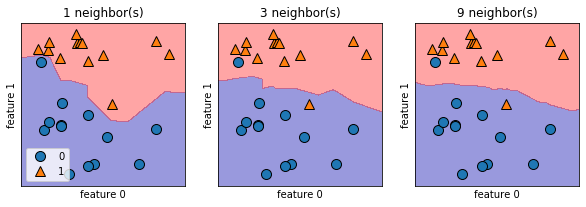

In [22]:
fig , axes = plt.subplots(1,3,figsize=(10,3))

for n_neighbors , ax in zip([1,3,9],axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=True,eps=0.5,ax=ax,alpha=.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)